# Digit MNIST Classifier

No tensorflow, no torch, no keras, Using Math and Numpy Only

Because I want to learn via the hard way lol

Coded and Created by Han Summer 2024

Part of The 20th Summer Project

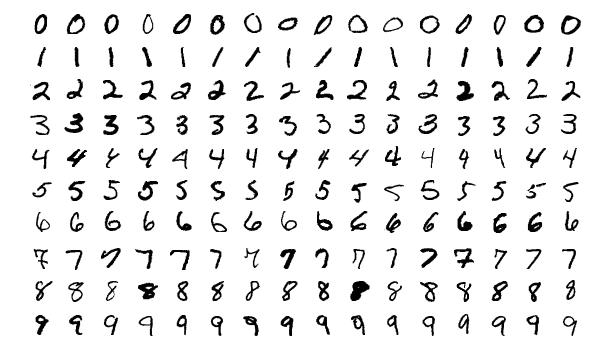

In [23]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

Exploring the dataset

In [24]:
df=pd.read_csv('train.csv')

In [25]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
df.shape

(42000, 785)

In [27]:
df['label'].value_counts()

label
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: count, dtype: int64

42k train set, with flattened 28x28 image => 784

Label -> 0-9

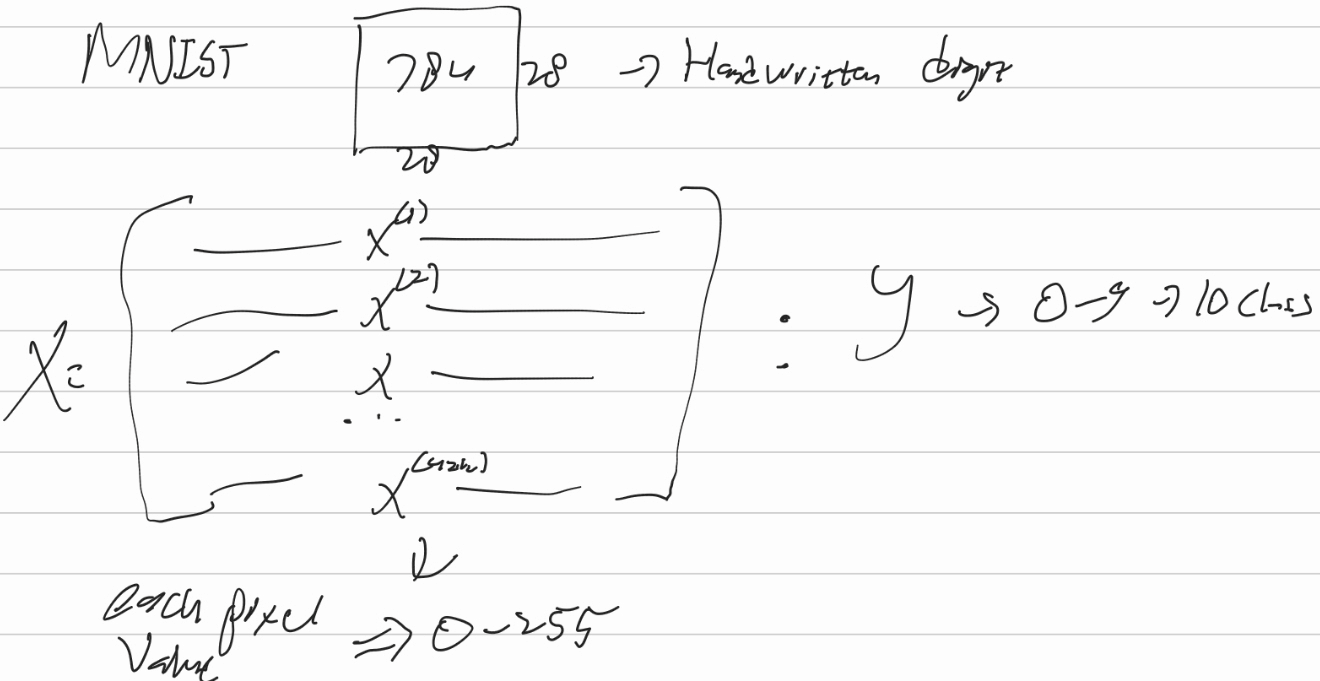

In [28]:
#Modify the pandas to np array for vectorization
data=np.array(df)
data

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [7, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [29]:
m,n=data.shape
m,n

(42000, 785)

Create the train data (shuffling it too) and transpose it to prepare the data for NN

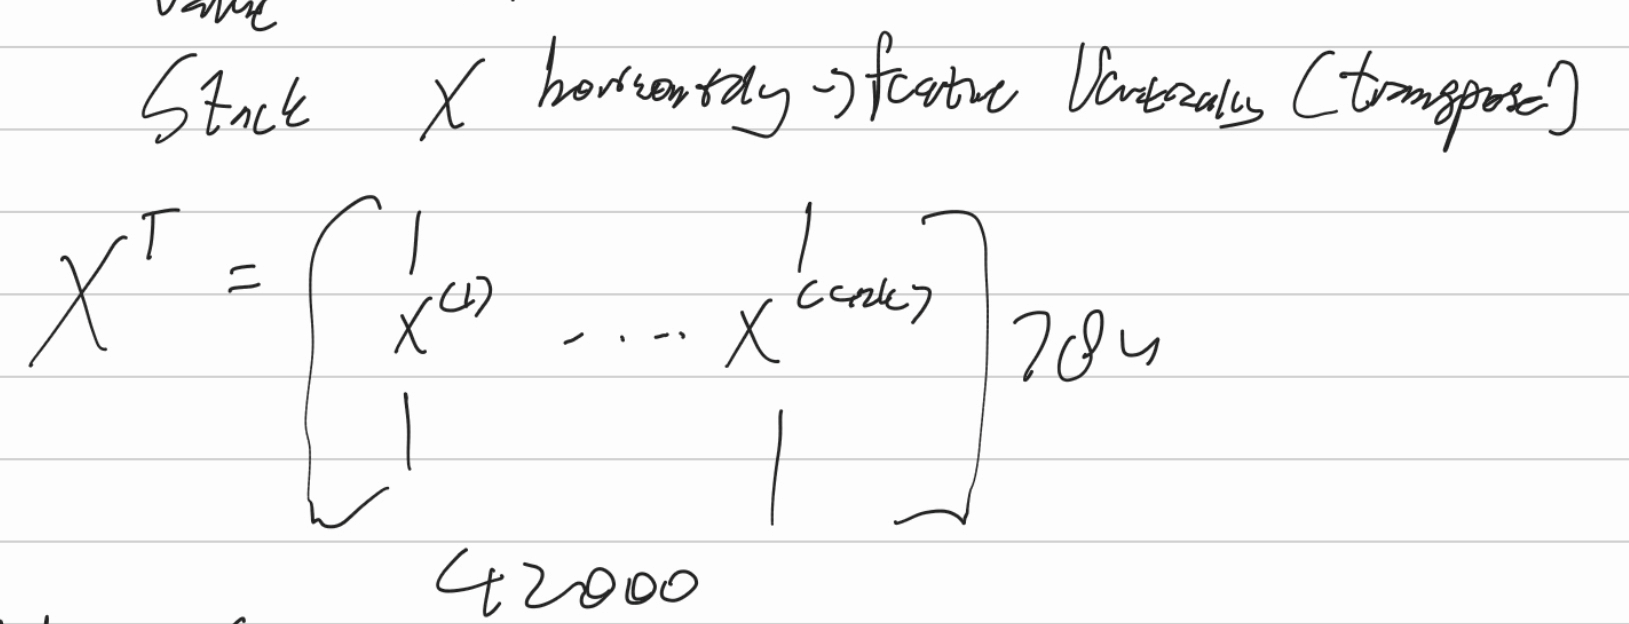

In [30]:
np.random.shuffle(data)

In [31]:
data_dev=data[:25200].T
data_dev.shape

(785, 25200)

In [32]:
Y_dev=data_dev[0]
X_dev=data_dev[1:]
X_dev=X_dev/255 #normalize the data
X_dev.shape

(784, 25200)

In [33]:
data_train=data[25200:].T
Y_train=data_train[0]
X_train=data_train[1:]
X_train=X_train/255
X_train.shape

(784, 16800)

#### Build Neural network

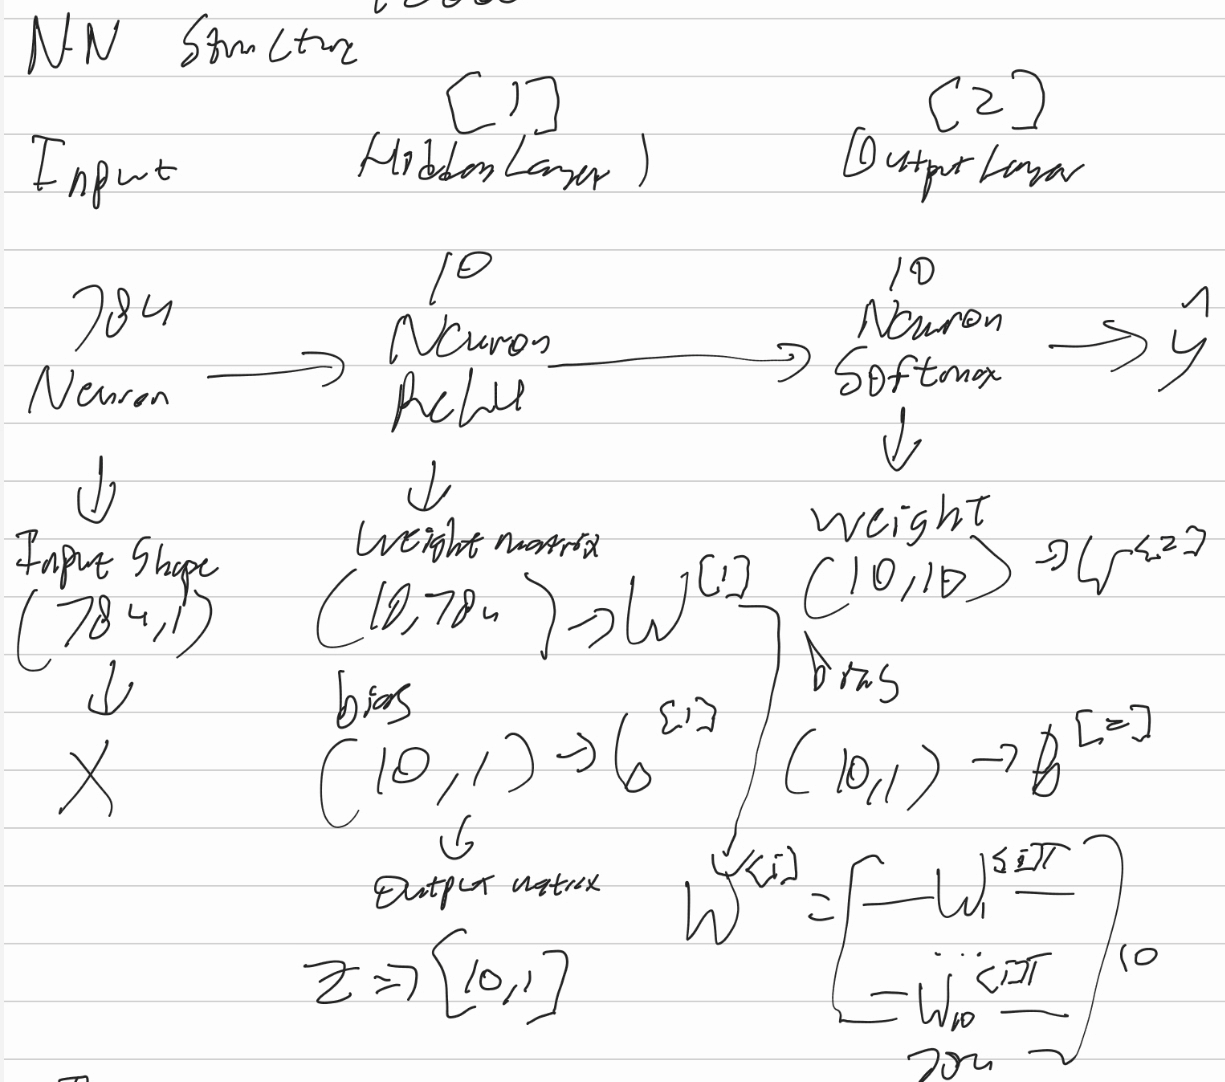

##### Initialize the weights and bias (parameters)

In [34]:
#
# 784 input shape (features)
# There are 10 neuron in the hidden and output layer
def initialize_params():
    #Weight and Bias are randomly initialized
    W1 = np.random.rand(10, 784)-0.5
    b1 = np.random.rand(10, 1) -0.5
    W2 = np.random.rand(10, 10) -0.5
    b2 = np.random.rand(10, 1)-0.5
    return W1, b1, W2, b2
    

##### Forward Prop

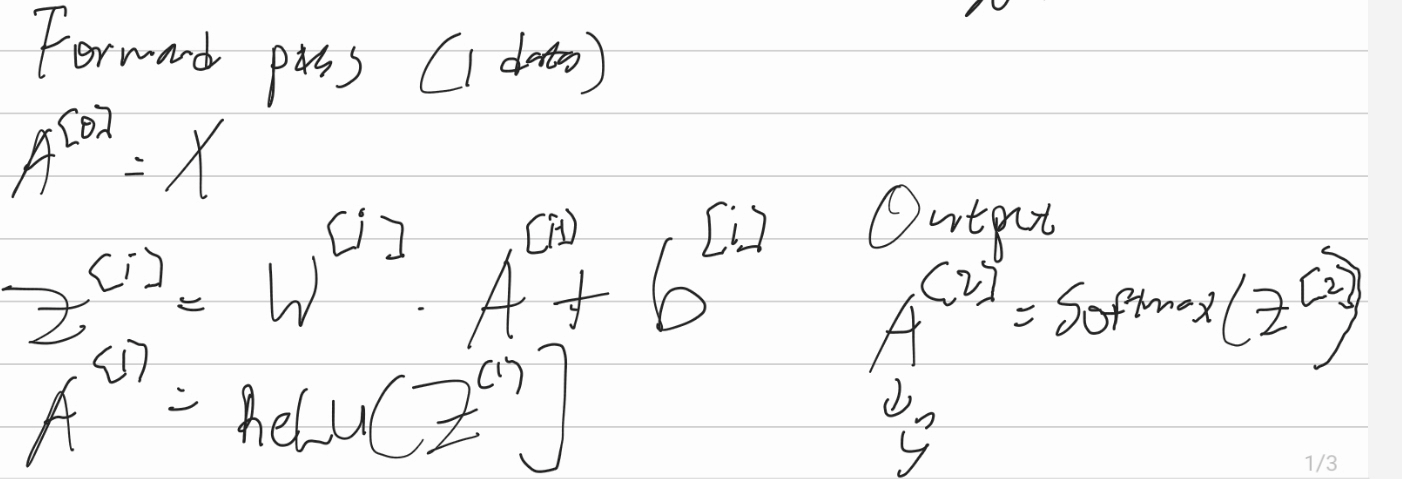

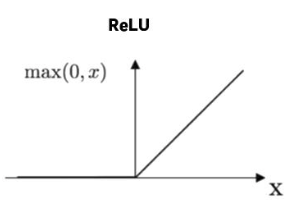 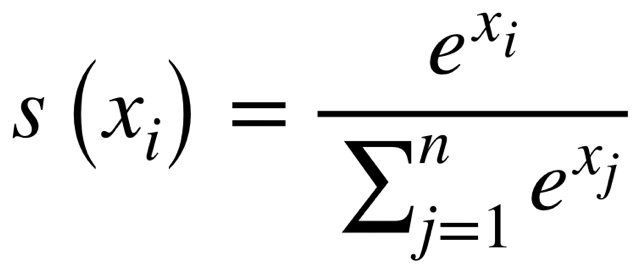

In [35]:
#Activation Function
def ReLU(z):
    # Going through the ReLU activation function for each value in Z matrix
    return np.maximum(0,z)

def Softmax(z):
    # Softmax activation function
    return np.exp(z)/np.sum(np.exp(z),axis=0) #sum it column wise

In [36]:
np.arange(Y_train.size) #Fill the array with the index of the array

array([    0,     1,     2, ..., 16797, 16798, 16799])

In [37]:
def forward_prop(W1,b1,W2,b2,X):
    #Doing matrix operation stuff
    Z1=W1.dot(X)+b1
    A1=ReLU(Z1)
    Z2=W2.dot(A1)+b2
    A2=Softmax(Z2)
    return Z1,A1,Z2,A2

##### Backpropagation

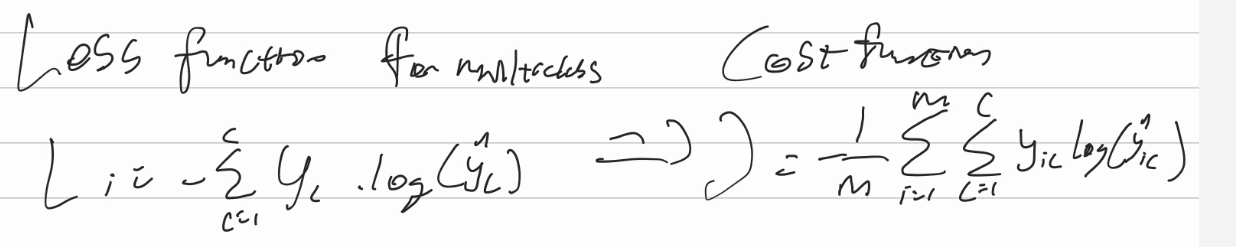

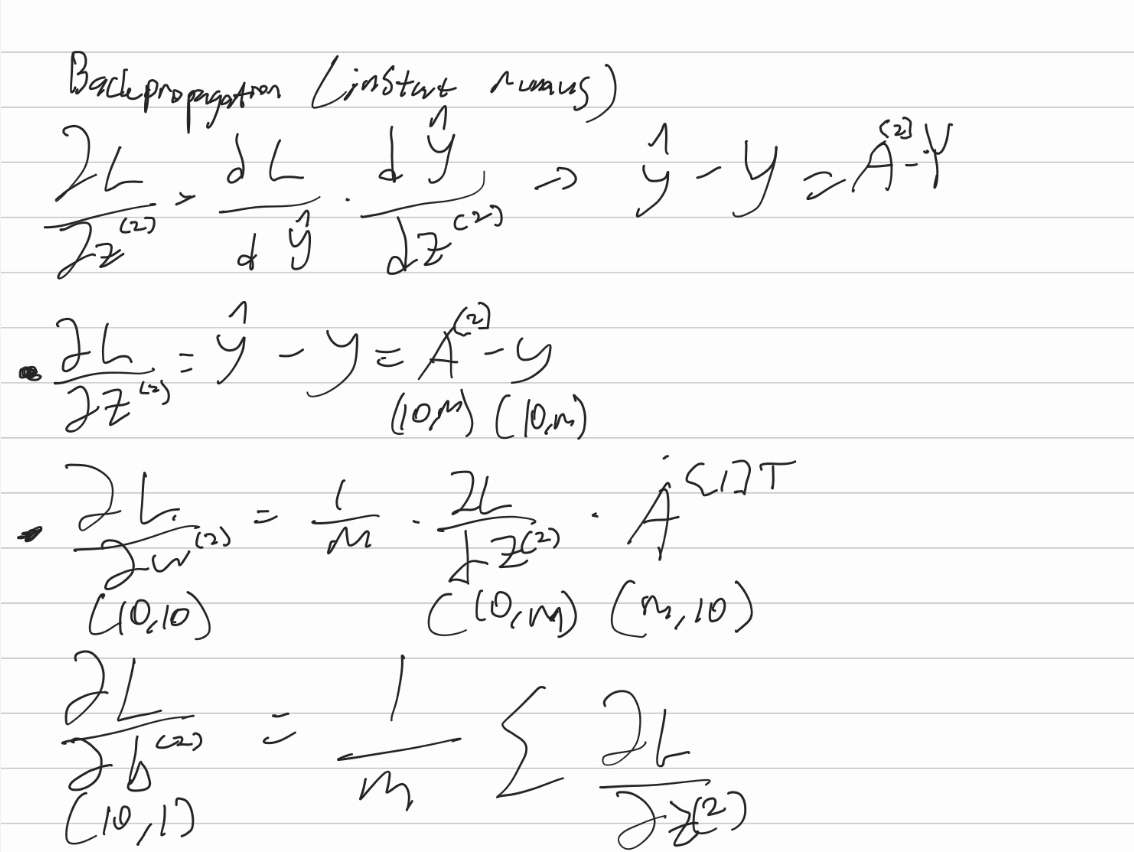 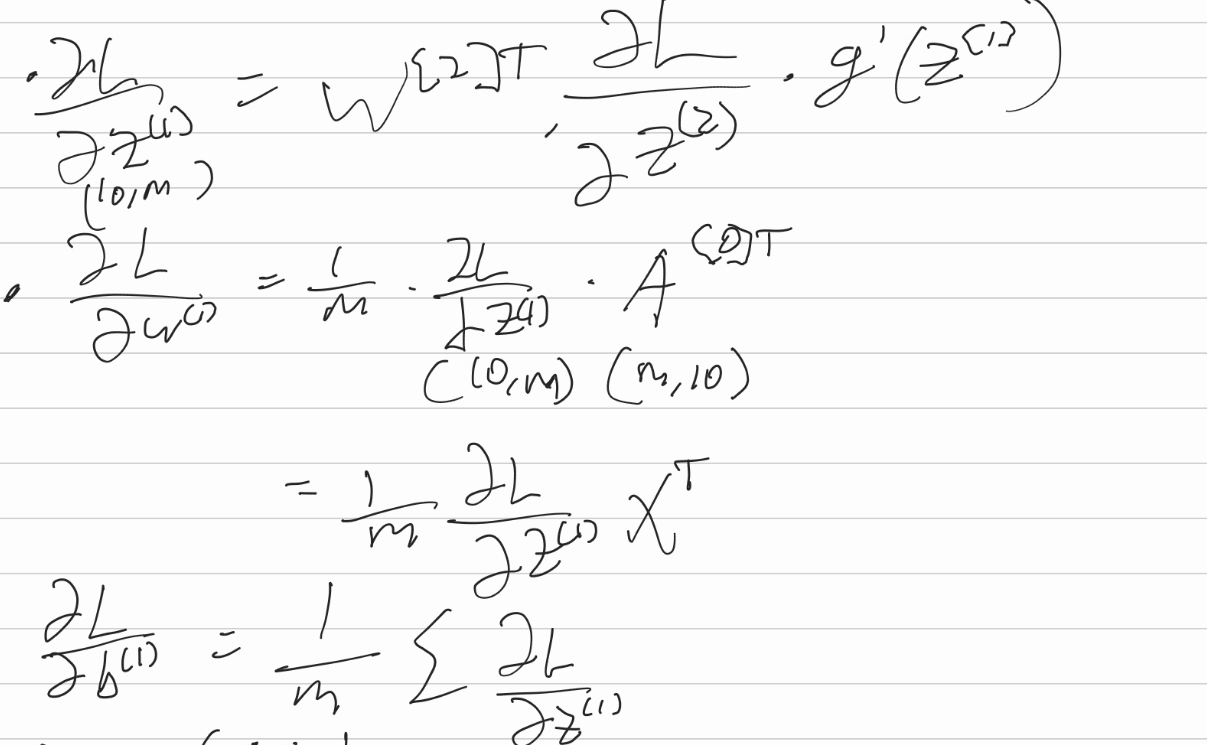

In [38]:
def one_hot(Y):#One hot encoding
    #Create matrix of zeros with the shape of the number of classes
    #Y.size is the number of samples, size= (rows * columns)
    #Y.max()+1 is the number of classes
    one_hot_Y=np.zeros((Y.size,Y.max()+1))
    #Fill the matrix with the one hot encoding; just go to the column of the class and set it to 1
    one_hot_Y[np.arange(Y.size),Y]=1
    #Transpose the matrix, because the matrix should be each column as a sample of data
    one_hot_Y=one_hot_Y.T
    return one_hot_Y

In [39]:
def dReLU(z):
    #Derivative of ReLU, slope(derivative) of the positive number is 1 and negative number is 0 (flat line)
    return z>0 #if Z1>0, True then 1, else 0 (g'(Z1))

In [40]:
def back_prop(Z1,A1,Z2,A2,W2,X,Y):
    m=Y.size
    one_hot_Y=one_hot(Y)
    #-------------------------
    dZ2= A2-one_hot_Y
    dW2=1/m * dZ2.dot(A1.T)
    db2= 1/m * np.sum(dZ2)
    #-------------------------
    dZ1= W2.T.dot(dZ2) * dReLU(Z1)
    dW1=1/m * dZ1.dot(X.T)
    db1= 1/m * np.sum(dZ1)
    
    return dW1,db1,dW2,db2

##### Update Params
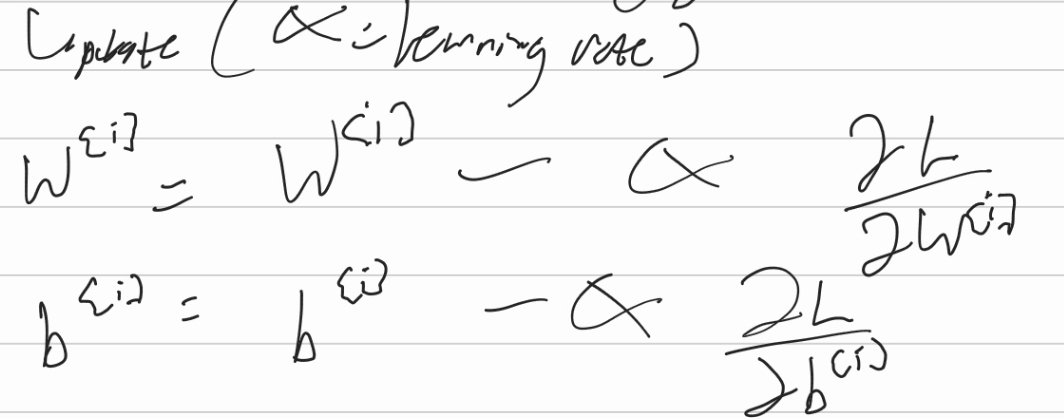

In [41]:
def update(W1,b1,W2,b2,dW1, dW2, db1, db2, alpha):
    W1=W1-alpha*dW1
    b1=b1-alpha*db1
    W2=W2-alpha*dW2
    b2=b2-alpha*db2
    return W1,b1,W2,b2

##### Model Training

In [42]:
def predict(A2):
    return np.argmax(A2,0) #Return the index of the maximum value in the array
def get_accuracy(predictions,Y):
    #Get the sum of the number of correct predictions
    #Divide by the number of samples
    return np.sum(predictions==Y)/Y.size

In [43]:
def gradient_descent(X,Y,alpha,epochs):
    W1,b1,W2,b2=initialize_params()
    #Training the model
    for i in range(epochs):
        Z1,A1,Z2,A2=forward_prop(W1,b1,W2,b2,X)
        dW1,db1,dW2,db2=back_prop(Z1,A1,Z2,A2,W2,X,Y)
        W1,b1,W2,b2=update(W1,b1,W2,b2,dW1,dW2,db1,db2,alpha)
        if i%10==0: #Print the loss every 10 epochs
            print('Iteration/Epoch: ',i)
            acctrain=get_accuracy(predict(A2),Y)
            print('Accuracy: ',acctrain)
            Z1,A1,Z2,A2=forward_prop(W1,b1,W2,b2,X_dev)
            accval=get_accuracy(predict(A2),Y_dev)
            print('Validation Accuracy: ',accval)
            # print(W1,b1,W2,b2)
            if (abs(acctrain-accval)>0.01):
                break
            
    
    return W1,b1,W2,b2

In [57]:
W1,b1,W2,b2= gradient_descent(X_train,Y_train,0.1,2500)

Iteration/Epoch:  0
Accuracy:  0.0818452380952381
Validation Accuracy:  0.08575396825396825
Iteration/Epoch:  10
Accuracy:  0.1675595238095238
Validation Accuracy:  0.17067460317460317
Iteration/Epoch:  20
Accuracy:  0.24071428571428571
Validation Accuracy:  0.23956349206349206
Iteration/Epoch:  30
Accuracy:  0.29601190476190475
Validation Accuracy:  0.2923015873015873
Iteration/Epoch:  40
Accuracy:  0.33535714285714285
Validation Accuracy:  0.32607142857142857
Iteration/Epoch:  50
Accuracy:  0.36375
Validation Accuracy:  0.3607142857142857
Iteration/Epoch:  60
Accuracy:  0.3985119047619048
Validation Accuracy:  0.39535714285714285
Iteration/Epoch:  70
Accuracy:  0.43160714285714286
Validation Accuracy:  0.4307142857142857
Iteration/Epoch:  80
Accuracy:  0.4716666666666667
Validation Accuracy:  0.4669047619047619
Iteration/Epoch:  90
Accuracy:  0.5099404761904762
Validation Accuracy:  0.5079365079365079
Iteration/Epoch:  100
Accuracy:  0.5483928571428571
Validation Accuracy:  0.5477777

## Model in action

In [58]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = predict(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [9]
Label:  5


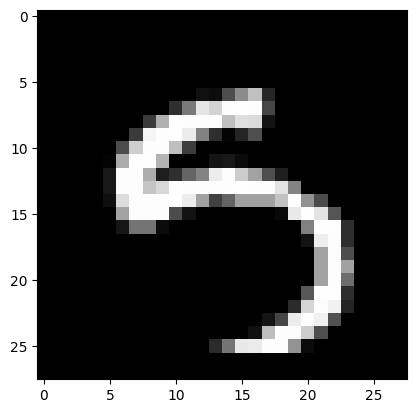

Prediction:  [6]
Label:  6


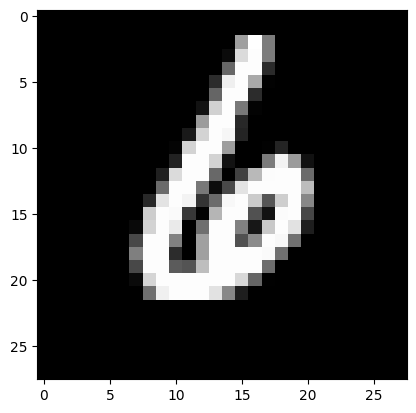

Prediction:  [9]
Label:  9


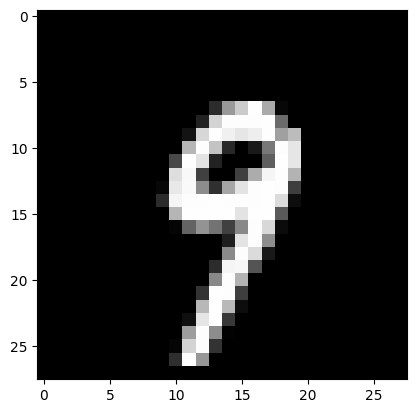

Prediction:  [6]
Label:  6


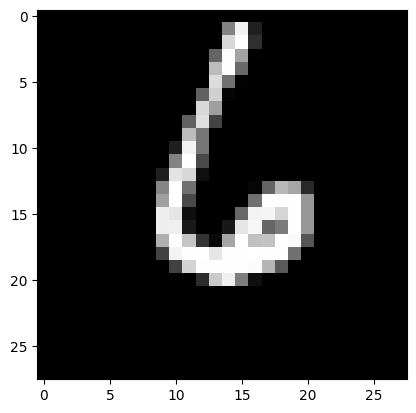

In [59]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)